In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pdb import set_trace
import glob

In [4]:
data_path_abbr = '/Users/omarschall/blueprint-stats/library/*.csv'
figs_path = '/Users/omarschall/blueprint-stats/figs/'
file_list = glob.glob(data_path_abbr)
file_list
df = pd.DataFrame()
for file in file_list:
    opponent = file.split('vs. ')[1].split(' 2019')[0]
    df_ = pd.read_csv(file)
    df_['opponent'] = opponent
    df = df.append(df_)
df = df.dropna(subset={'Thrower', 'Receiver'})

In [6]:
turnover = np.array(df['Turnover?'])
yards = np.array(df['Forward distance (m)'])

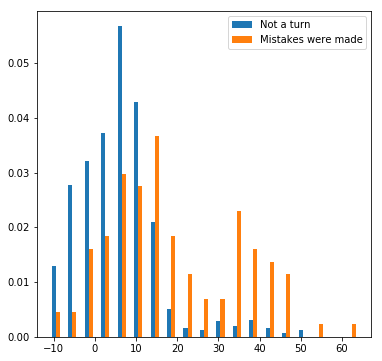

In [22]:
fig = plt.figure(figsize=(6, 6))
bins = np.arange(-10, 70, 4)
H_turn, bin_edges = np.histogram(yards[np.where(turnover==1)], bins=bins, normed=True)
H_completion, bin_edges = np.histogram(yards[np.where(turnover==0)], bins=bins, normed=True)
plt.bar(bin_edges[:-1], H_completion, width=1)
plt.bar(bin_edges[:-1] + 1, H_turn, width=1)
plt.legend(['Not a turn', 'Mistakes were made'])
#plt.hist(yards[np.where(turnover==1)], bins=20)
fig.savefig(os.path.join(figs_path, 'turn_yardage_hist.pdf'), dpi=300, format='pdf')

In [23]:
H_completed, bin_edges = np.histogram(yards, bins=bins, weights=(1 - turnover), normed=False)
H_total, bin_edges = np.histogram(yards, bins=bins, normed=False)

/Users/omarschall/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


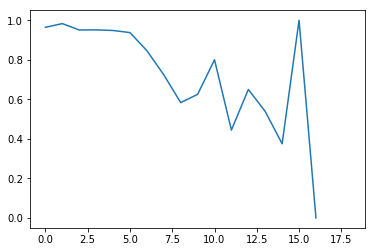

In [25]:
plt.plot(H_completed/H_total)

In [27]:
completion_pct = H_completed/H_total
completion_ste = (1 - completion_pct) * completion_pct / np.sqrt(H_total)

/Users/omarschall/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


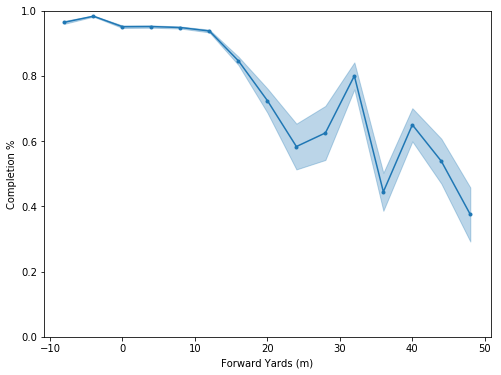

In [39]:
fig = plt.figure(figsize=(8, 6))
x = bin_edges[:-5] + 2
pct = completion_pct[:-4]
ste = completion_ste[:-4]
plt.plot(x, pct, '.', color='C0')
plt.plot(x, pct, color='C0')
plt.fill_between(x, pct - ste, pct + ste, color='C0', alpha=0.3)
plt.xlabel('Forward Yards (m)')
plt.ylabel('Completion %')
plt.ylim([0, 1])
fig.savefig(os.path.join(figs_path, 'completion_pct.pdf'), dpi=300, format='pdf')

In [29]:
H_total

array([ 56, 118, 142, 164, 251, 192, 104,  29,  12,   8,  15,  18,  20,
        13,   8,   5,   1,   0,   1])